In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


In [22]:
df = pd.read_csv(r"C:\Users\abkumarc\Desktop\prac\ML\kaggle\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
df.shape

(1025, 14)

In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

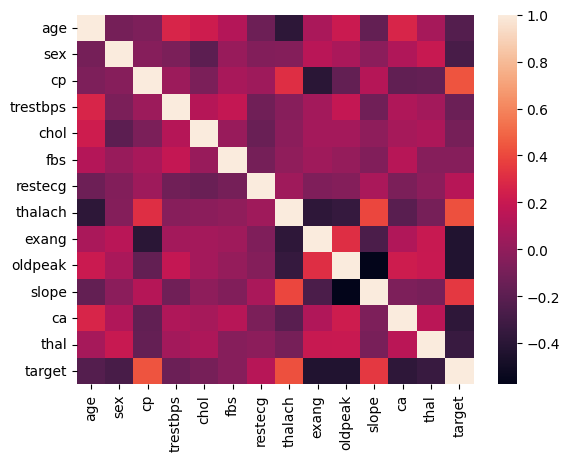

In [26]:
sns.heatmap(df.corr())

In [27]:
X, y = df.iloc[:,:-1], df.iloc[:, -1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [29]:
print(X_train.shape, X_test.shape)

(820, 13) (205, 13)


In [30]:
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()
rf = RandomForestClassifier(max_samples=0.75, random_state=42)

In [31]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\abkumarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7853658536585366

In [32]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6829268292682927

In [33]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9317073170731708

In [34]:
rf = RandomForestClassifier(max_samples=0.75, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9853658536585366

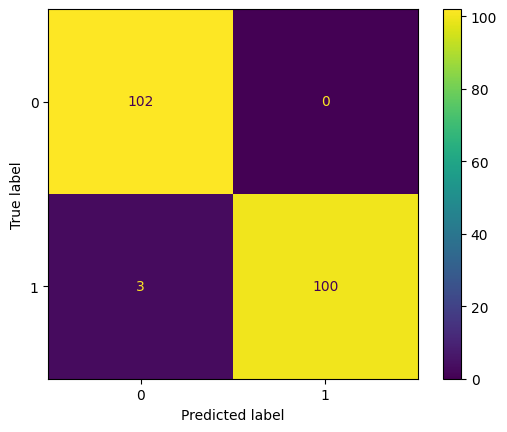

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))

cm.plot()



In [36]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(), X, y, cv = 10, scoring = 'accuracy'))

0.9970588235294118

In [37]:
np.mean(cross_val_score(GradientBoostingClassifier(), X, y, cv = 10, scoring = 'accuracy'))

0.9707405292213973

In [38]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)